# MULTIVARIABLE LINEAR REGRESSION

Imported libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
warnings.filterwarnings('ignore')

Using linear regression to predict the Hoopnet rating

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
regWEKA = LinearRegression()
regAll = LinearRegression()

# NBA Data - WEKA attributes

We used WEKA to help us determine what were the best attributes to look at in order to predict our Hoopnet rating. The 8 metrics that were chosen were age, # of field goals, field goal percentage, 2-pointer percentage, effective field goal percentage, defensive rebounds, steals, and blocks. Once we filtered for the WEKA requested metrics, we split the master data, which consists of all the NBA data combined, into appropriate training and testing sets for the linear regression model. We then predicted the values of the testing set and compared them to the actual values, and got a r2 score of ~65%. That means our model is able to accurately predict Hoopnet rating with up to ~65% accuracy, which means that our model does a relatively decent job. We then plotted the actual and predicted values to get a visual representation of how our model did. 

We chose to use the r2 metric to base our accuracy since the r2 score is defined as "the proportion of the variance in the dependent variable that is predictable from the independent variable(s).” In other words, it shows how correlated the values are. If it is 100%, the two variables are perfectly correlated. Since we got an r2 score of ~65%, this means that our regression model is not the most completely valid since it isn't at 100%.

In [4]:
dn = pd.read_csv('Downloads/Master data - NBA.csv')
dataNBA = dn[['Age', 'FG', 'FG%', '2P%', 'eFG%', 'DRB', 'STL', 'BLK']]
hoopnetNBA = dn['Hoopnet']

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(dataNBA, hoopnetNBA, train_size=0.70, test_size = 0.3, random_state=42)

In [6]:
regWEKA.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
predictedWEKA = regWEKA.predict(X_test)

In [8]:
r2_score(Y_test, predictedWEKA)

0.6528848696631478

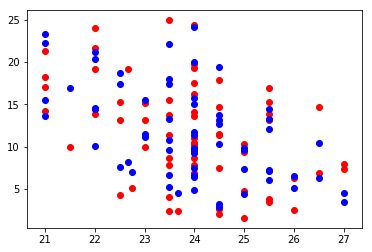

In [9]:
plt.scatter(X_test.iloc[:,0].values, Y_test, color = 'red')
plt.scatter(X_test.iloc[:,0].values, predictedWEKA, color = 'blue')
plt.show()

# NBA Data all

In this case, we decided to keep all of the attributes to test if WEKA did a good job at deciding what attributes were the best at predicting Hoopnet rating. We then split the master data, which consists of all the NBA data combined, into appropriate training and testing sets for the linear regression model. We then predicted the values of the testing set and compared them to the actual values, and got a r2 score of ~68%. That means our model is able to accurately predict Hoopnet rating with up to ~68% accuracy, which means that our model does a relatively decent job. We then plotted the actual and predicted values to get a visual representation of how our model did. 

We chose to use the r2 metric to base our accuracy since the r2 score is defined as "the proportion of the variance in the dependent variable that is predictable from the independent variable(s).” In other words, it shows how correlated the values are. If it is 100%, the two variables are perfectly correlated. Since we got an r2 score of ~68%, this means that our regression model is not the most completely valid since it isn't at 100%.

Even though the model with all the attributes was higher than the WEKA-based model, the two models differed by only ~3% in accuracy. The full model had 27 attributes while the WEKA-based model had only 8, so we can respect the WEKA-based model since it incorporated less than 1/3 of the attributes as the full model.

In [10]:
dn = pd.read_csv('Downloads/Master data - NBA.csv')
dataNBAx = dn[['Years in College', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PS/G']]
hoopnetNBAx = dn['Hoopnet']

dataNBA = dataNBAx.reset_index().fillna(0)
hoopnetNBA = hoopnetNBAx.reset_index().fillna(0)

In [11]:
dataNBA.drop(['index'], axis=1, inplace=True)

In [12]:
hoopnetNBA.drop(['index'], axis=1, inplace=True)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(dataNBA, hoopnetNBA, train_size=0.70, test_size = 0.3, random_state=42)

In [14]:
regAll.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
predictedAll = regAll.predict(X_test)

In [16]:
r2_score(Y_test, predictedAll)

0.6798214493424604

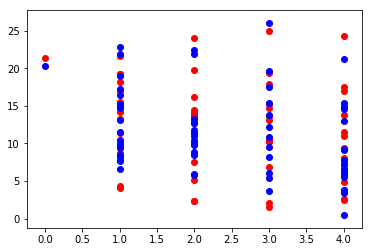

In [17]:
plt.scatter(X_test.iloc[:,0].values, Y_test, color = 'red')
plt.scatter(X_test.iloc[:,0].values, predictedAll, color = 'blue')
plt.show()

# Predicting the 2019 draft class

There are 50 players as of now that have declared for the draft, and we have college statistics for only 44 of them since those 44 played college basketball in the United States. We have their most reason college season stats, and we are going to predict their Hoopnet ranking using that data. The Hoopnet ranking will be a estimation of their skill in 5 years. We will be using the WEKA model because it is a lot more efficient than the full model because it is only 3% less accurate with a third of the attributes. 

With this model we aren't able to definitely establish what order they should be drafted in, since our accuracy for the WEKA model is ~65%. However, this model is able to group the players into different groups based on their predicted Hoopnet ranking. Players like Zion, Bol, and Ja are ahead of the pack, while players like Kevin, Nassir, and Jontay are at the bottom of the pack. 

Coaches can use this predicted Hoopnet ranking to see who would be the best asset to their respective team based on what they want. If they are looking for a certain type of player, they can identify which of the potential draftees plays that position, and then look at the Hoopnet rankings to see who is the best out of the players they have identified. 

In [18]:
draft2019 = pd.read_csv('Downloads/2019 Draft Stats  - Sheet1.csv')
names = draft2019[['Player']]
weka = draft2019[['Age', 'FG', 'FG%', '2P%', 'eFG%', 'DRB', 'STL', 'BLK']]

In [19]:
predicted = regWEKA.predict(weka)
predicted = pd.DataFrame(data=predicted)

In [20]:
players = names.values
hoopnet = predicted.values

concat = np.concatenate((players, hoopnet), axis=1)
final = pd.DataFrame(concat, columns=['Player', 'Hoopnet Ranking'])
final

,Player,Hoopnet Ranking
0,Zion Williamson,34.6178
1,Ja Morant,26.2848
2,RJ Barrett,24.0199
3,Jaxson Hayes,19.04
4,Darius Garland,17.4425
5,Coby White,15.7677
6,Cam Reddish,14.1665
7,Jarrett Culver,21.9315
8,De'Andre Hunter,15.845
9,PJ Washington,18.6811
